In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
plt.style.use('dark_background')
import seaborn as sns
from IPython.display import Image, display
from matplotlib.ticker import MaxNLocator
#from fbprophet import Prophet
import squarify

In [2]:
df=pd.read_csv("washdash-expected.csv")
df.head()

,Unnamed: 0,Country,Year,Service Type_x,Expected_Value_Water,Service Type_y,Expected_Value_Sanitation,Service Type,Expected_Value_Hygiene
0,0,Afghanistan,2005,Drinking water,1.555984,Sanitation,1.405571,Hygiene,1.802676
1,1,Afghanistan,2006,Drinking water,1.610704,Sanitation,1.440230,Hygiene,1.804166
2,2,Afghanistan,2008,Drinking water,1.726436,Sanitation,1.511591,Hygiene,1.807183
3,3,Afghanistan,2009,Drinking water,1.784809,Sanitation,1.547524,Hygiene,1.808702
4,4,Afghanistan,2010,Drinking water,1.843520,Sanitation,1.583627,Hygiene,1.810229


## other diseases

In [3]:
zica = pd.read_csv("cdc_zika.csv")
ebola = pd.read_csv("ebola.csv")
swineflu = pd.read_csv('swineflu/h1n12009.csv', encoding = "ISO-8859-1")
zica.head()
# cases of swine flu in 2009, use for coronavirus
# clean data
# combine data
# use x to predict y
# add more country data

/home/vno/pythonprojects/python_projects_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [3]:
to_dropid = ['Unnamed: 0','Service Type_x','Service Type_y','Service Type']
df.drop(to_dropid,inplace=True, axis=1)

In [7]:
diceases = pd.read_csv('hivtuberculosis.csv')

In [8]:
hiv = pd.read_csv('malaria.csv')
tuberculosis = pd.read_csv('tuberculosis.csv')
hepatitb = pd.read_csv('hepatitb.csv')

## Tuberculosis tidying data

In [9]:
tuberculosis.columns = ['Country','2018','2017','2016','2015','2014','2013','2012','2011','2010']

In [10]:
def getuncertanties(item):
    if '[' in item:
        return item[:item.find('[')]
    else:
        return item

In [11]:
def split(item):
    return item.str.split('[').str[0]

In [12]:
tuberculosis = tuberculosis.apply(split).drop(tuberculosis.index[[0,1]])

In [13]:

tuberculosis=pd.melt(tuberculosis, id_vars=['Country'], var_name='year', value_name='tuberculosis')

In [22]:
tuberculosis['tuberculosis']=tuberculosis.tuberculosis.astype(float)
tuberculosis['year']=tuberculosis['year'].astype(int)

In [23]:
tuberculosis.dropna()
#tuberculosis['tuberculosis'].astype(str).astype(float)

,Country,year,tuberculosis
0,Afghanistan,2018,189.0
1,Albania,2018,18.0
2,Algeria,2018,69.0
3,Andorra,2018,3.0
4,Angola,2018,355.0
...,...,...,...
1741,Venezuela (Bolivarian Republic of),2010,28.0
1742,Viet Nam,2010,231.0
1743,Yemen,2010,52.0
1744,Zambia,2010,495.0


## Tuberculosis Incidences by Year

Text(0.5, 0, 'Year')

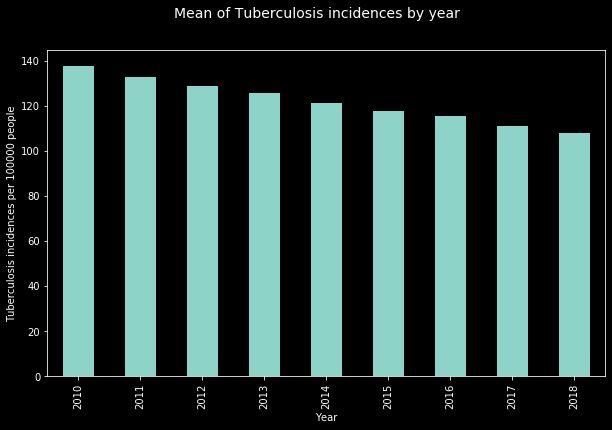

In [24]:
plt.style.use('dark_background')
tuberculosis.groupby('year')['tuberculosis'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Mean of Tuberculosis incidences by year', fontsize=14)
plt.ylabel('Tuberculosis incidences per 100000 people')
plt.xlabel('Year') 

In [47]:
tuberculosis.sort_values(by='tuberculosis', ascending=False)
tuberculosis

,Country,year,tuberculosis
0,Afghanistan,2018,189.0
1,Albania,2018,18.0
2,Algeria,2018,69.0
3,Andorra,2018,3.0
4,Angola,2018,355.0
...,...,...,...
1741,Venezuela (Bolivarian Republic of),2010,28.0
1742,Viet Nam,2010,231.0
1743,Yemen,2010,52.0
1744,Zambia,2010,495.0


## Subsetting data to include only South East Asia

In [28]:
#tuberculosis['tuberculosis'].astype(int)
tuberculosis.to_csv('TB_Y_cleaned.csv')
seatb=tuberculosis[tuberculosis['Country'].isin(['Indonesia', 'Malaysia','Maynmar','Laos','Thailand','Vietnam','Singapore','Cambodia','East Timor','Brunei','Philippines','Myanmar'])]
seatb.head()
seawash=df[df['Country'].isin(['Indonesia', 'Malaysia','Maynmar','Laos','Thailand','Vietnam','Singapore','Cambodia','East Timor','Brunei','Philippines','Myanmar'])]
seawash

,Country,Year,Expected_Value_Water,Expected_Value_Sanitation,Expected_Value_Hygiene
145,Cambodia,2008,2.101690,1.087102,2.216109
146,Cambodia,2009,2.142178,1.181170,2.218498
147,Cambodia,2010,2.182664,1.275551,2.220920
148,Cambodia,2011,2.223147,1.370247,2.223375
149,Cambodia,2012,2.263625,1.465257,2.225863
150,Cambodia,2013,2.304092,1.560566,2.228378
151,Cambodia,2014,2.344559,1.656204,2.230933
152,Cambodia,2016,2.425470,1.848422,2.236143
153,Cambodia,2017,2.465925,1.931738,2.238791
364,Indonesia,2006,2.598264,1.945159,2.014169


## Medians of Tuberculosis Incidences in South East Asia

Text(0.5, 0, 'year')

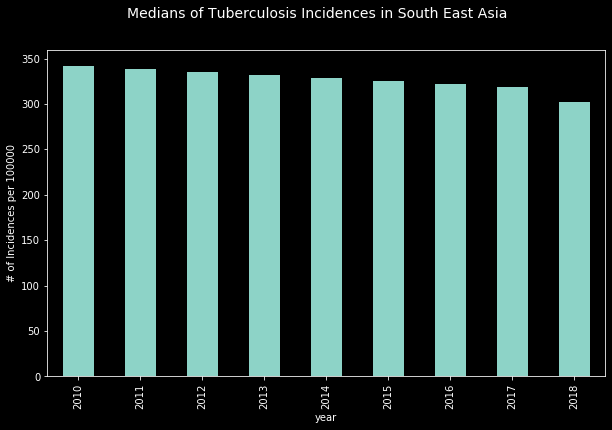

In [29]:
seatb.groupby('year')['tuberculosis'].median().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Medians of Tuberculosis Incidences in South East Asia', fontsize=14)
plt.ylabel('# of Incidences per 100000')
plt.xlabel('year')

## Tuberculosis Incidences By Country and Year in South East Asia

In [46]:
plt.style.use('dark_background')
import plotly.express as px
fig = px.bar(seatb, x="Tuberculosis", y="Year", color='Country', orientation='h',
             hover_data=[],
             height=600,
             title='Tuberculosis Incidences by Country and Year in South East Asia', text='Tuberculosis')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


## Merged Tuberculosis with WASH for South East Asian Countries


In [79]:
seatb.columns=['Country','Year','Tuberculosis']
seatbmerge=pd.merge(seatb, seawash, how='right', left_on=['Year','Country'], right_on = ['Year', 'Country'])
seatb.dtypes
seawash.dtypes
seatbmerge
#seatbmerge['yoypercent']=
seatbmerge.dtypes
#seawash.dtypes
#seatb.dtypes

Country                       object
Year                           int64
Tuberculosis                 float64
Expected_Value_Water         float64
Expected_Value_Sanitation    float64
Expected_Value_Hygiene       float64
dtype: object

## Corrolelogram of Tuberculosis with Expected Values of WASH

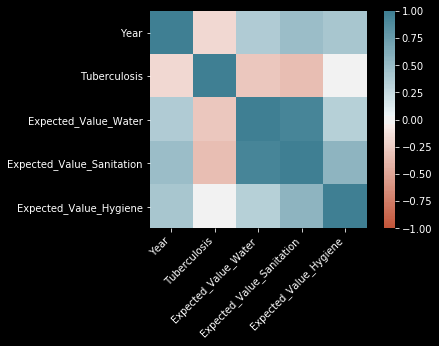

In [52]:
corr = seatbmerge.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [59]:
seatbmerge['Expected_Value_Water'].corr(seatbmerge['Tuberculosis'])
seatbmerge['Expected_Value_Sanitation'].corr(seatbmerge['Tuberculosis'])
seatbmerge['Expected_Value_Hygiene'].corr(seatbmerge['Tuberculosis'])

-0.3401256317533386

## Wash Levels in South East Asia from 2006-2017

Text(0.5, 0, 'Year')

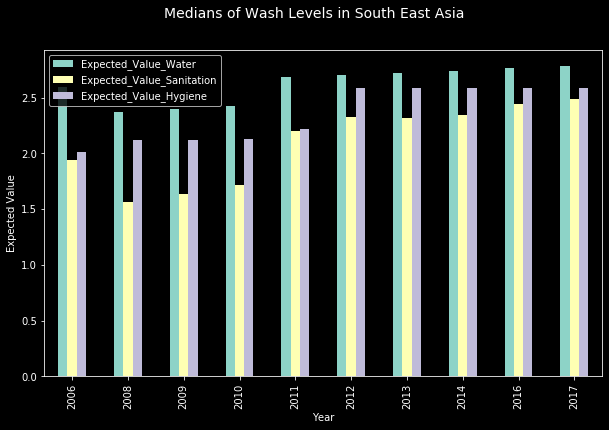

In [38]:
seawash.groupby('Year')['Expected_Value_Water', 'Expected_Value_Sanitation', 'Expected_Value_Hygiene'].median().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Medians of Wash Levels in South East Asia', fontsize=14)
plt.ylabel('Expected Value')
plt.xlabel('Year')

In [24]:
heapatitb = hepatitb.apply(split).drop(hepatitb.index[[0,1]])
heapatitb.columns=['Country','Hepatitis B prevalence < 5 yr(%)']
heapatitb

,Country,Hepatitis B prevalence < 5 yr(%)
2,Afghanistan,0.50
3,Albania,1.29
4,Algeria,0.22
5,Andorra,0.08
6,Angola,4.85
...,...,...
191,Venezuela (Bolivarian Republic of),0.62
192,Viet Nam,1.20
193,Yemen,2.54
194,Zambia,1.84


## Population Density

In [180]:
dfpd=pd.read_csv('population_density_cleaned.csv')
to_dropid = ['Unnamed: 0']
dfpd.drop(to_dropid,inplace=True, axis=1)
dfpd.columns = ['Country','2010','2011','2012','2013','2014','2015','2016','2017','2018']
dfpd=pd.melt(dfpd, id_vars=['Country'], var_name='Year', value_name='population')
dfpd
dfpd=dfpd.dropna()
dfpd['Year']=dfpd['Year'].astype(int)
dfpd['population']

0       44.7040820390283
1       106.314635036496
2       15.1055341892902
3                280.395
4       179.678723404255
              ...       
2411    50.7620843086558
2412    50.7586283354254
2413    50.7620843086558
2414    45.4691766291018
2415    59.6362362611782
Name: population, Length: 2376, dtype: object

In [181]:
def split(item):
    return item.str.split('.').str[0]

def getuncertanties(item):
    if '.' in item:
        return item[:item.find('')]
    else:
        return item

In [182]:
dfpd['population']=split(dfpd['population'])
dfpd['population']=dfpd.population.astype(str)
sea=dfpd[dfpd['Country'].isin(['Indonesia', 'Malaysia','Maynmar','Laos','Thailand','Vietnam','Singapore','Cambodia','East Timor','Brunei','Philippines','Myanmar'])]
sea

seatbmergepd=pd.merge(seatbmerge, sea, how='left', left_on=['Year','Country'], right_on = ['Year', 'Country'])
seatbmergepd

,Country,Year,Tuberculosis,Expected_Value_Water,Expected_Value_Sanitation,Expected_Value_Hygiene,population
0,Cambodia,2017,326.0,2.465925,1.931738,2.238791,90
1,Indonesia,2017,319.0,2.786007,2.488244,2.052676,146
2,Myanmar,2017,355.0,2.547131,2.285972,2.675554,81
3,Philippines,2017,554.0,2.889947,2.628653,2.589862,352
4,Thailand,2017,156.0,2.999307,2.986947,2.684556,135
5,Cambodia,2016,347.0,2.425470,1.848422,2.236143,89
6,Indonesia,2016,322.0,2.770185,2.441131,2.049419,144
7,Myanmar,2016,372.0,2.523574,2.294000,2.674907,81
8,Philippines,2016,554.0,2.880276,2.607789,2.589282,347
9,Thailand,2016,160.0,2.985532,2.983385,2.684810,135


In [185]:
#dfpd["population"] = dfpd.population.convert_objects(convert_numeric=True)
seatbmergepd["population"] = pd.to_numeric(seatbmergepd.population, errors='coerce')
seatbmergepd.dtypes
seatbmergepd = seatbmergepd[seatbmergepd['population'].notna()]

In [194]:
import plotly.express as px
fig = px.scatter(seatbmergepd, x="Tuberculosis", y="Expected_Value_Water", animation_frame="Year",
        size="population", color="Country", hover_name="Country", facet_col="Country"
           ,log_x=True, size_max=45)
fig.show()


In [200]:
import plotly.express as px
fig = px.scatter(seatbmergepd.query("Year==2017"), x="Tuberculosis", y="Expected_Value_Water", size="population", color="Country",
           hover_name="Country", log_x=True, size_max=60)
fig.show()

## ADDING CHE


In [203]:
che=pd.read_csv('CHE_Cleaned.csv')
che.dtypes

Unnamed: 0              int64
Country Name           object
2010                   object
2011                   object
2012                   object
2013                   object
2014                   object
CHE per capita 2015    object
CHE per capita 2016    object
dtype: object

## Adding immunization